#Introduction

.....


Check to see if jupyter lab uses the correct python interpreter with '!which python'.
It should be something like '/opt/anaconda3/envs/[environment name]/bin/python' (on Mac).
If not, try this: https://github.com/jupyter/notebook/issues/3146#issuecomment-352718675

In [1]:
!which python

/Users/alexcrystal/opt/anaconda3/envs/env/bin/python


# Install dependencies:

In [1]:
install_packages = True
if install_packages:
    !conda install tensorflow=2 -y
    !conda install -c anaconda pandas -y
    !conda install -c conda-forge tensorflow-hub -y
    !conda install -c akode html2text -y
    !conda install -c conda-forge tqdm -y
    !conda install -c anaconda scikit-learn -y
    !conda install -c conda-forge matplotlib -y
    !conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /Users/alexcrystal/opt/anaconda3/envs/env

  added / updated specs:
    - tensorflow=2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         121 KB
    openssl-1.1.1h             |       haf1e3a3_0         2.2 MB
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following packages will be UPDATED:

  certifi                anaconda::certifi-2020.6.20-py36_0 --> pkgs/main::certifi-2020.11.8-py36hecd8cb5_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                  anaconda --> pkgs/main
  openssl                                          anaconda --> pkgs/main



ca-certificates-2020 | 121 KB    | ####8                     

# Imports

In [2]:
#imports
import pandas as pd
import numpy as np
import os
import time
import tensorflow as tf
import tensorflow_hub as hub
import zipfile
from html2text import HTML2Text
from tqdm import tqdm
import re
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas print options
This will improve readability of printed pandas dataframe.


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Set global Parameters
Set your parameters here:

data_path: In this path put the data you have downloaded with YouTube Data Tools. 
output_path: Tghe files generated in this notebook will be saved here.

url_dict: URLs to models on Tensorflow hub are saved here. Other models are available there.
model_type: Define which model you would like to use. Choose one from url_dict

new_embeddings: If this is true, new embeddings will be generated and saved at output_path. Otherwise, embeddings are loaded from Disc.




In [11]:
data_path = '/Users/alexcrystal/Dev/Sociology/file.tab'
output_path = "./output/"

new_embeddings = True

url_dict = {
            'Transformer' : "https://tfhub.dev/google/universal-sentence-encoder-large/5",
            'DAN' : "https://tfhub.dev/google/universal-sentence-encoder/4",
            'Transformer_Multilingual': "https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3"
}

model_type = 'Transformer' #@param ['DAN','Transformer','Transformer_Multilingual']

## Create output directory
Try to create the directory defined by output_path

In [6]:
try:
   os.mkdir(output_path)
except OSError:
  print ("Creation of the directory %s failed" % output_path)
else:
  print ("Successfully created the directory %s " % output_path)


Successfully created the directory ./output/ 


# Load Data
Load you data as a pandas dataframe

In [12]:
if new_embeddings:
    data = pd.read_csv(data_path,sep='\t',header=(0))
    data.head()

# Preprocessing
Preprocess your data:
- Drop empty rows
- Drop unused columns

In [13]:
if new_embeddings:
    data = data.dropna(subset=['text', 'authorName']) # drop rows with no content
    data=data.drop(['id', 'replyCount','likeCount','authorChannelUrl','authorChannelId','isReplyTo','isReplyToName'],axis=1) # drop unused columns
    data.head()

- remove HTML-tags, links and usernames

In [14]:
if new_embeddings:
    # Remove HTML tags
    tqdm.pandas()
    h = HTML2Text()
    h.ignore_links = True
    data['cleaned'] = data['text'].progress_apply(lambda x: h.handle(x))
    print( "Removed HTML Tags.")

    # Remove links
    http_link_pattern = r'http\S+'
    bitly_link_pattern = r'bit.ly/\S+'
    data['cleaned'] = data['cleaned'].str.replace(http_link_pattern, '')
    data['cleaned'] = data['cleaned'].str.replace(bitly_link_pattern, '')
    print( "Removed Links.")

    # Remove user names
    keep_names = ["earth", "Tide", "Geologist", "A Person", "Titanic", "adventure", "Sun", "The United States Of America"] # user names we want to keep
    user_names = [name for name in data['authorName'].unique() if (len(name)> 3 and name not in keep_names)]
    data['cleaned'] = data['cleaned'].str.replace('|'.join(map(re.escape, user_names)), '')
    print( "Removed user names.")

100%|██████████| 4510/4510 [00:00<00:00, 8621.79it/s]


Removed HTML Tags.
Removed Links.
Removed user names.


# Save or Load preprocessed data

Save your data afte preprocessing, or load preprocessed data from disc.

In [15]:
if new_embeddings:
  data.to_pickle(output_path+'data_preprocessed'+'.pkl')
else:
  data = pd.read_pickle(output_path+'data_preprocessed'+'.pkl')
data.head()

,publishedAt,authorName,text,isReply,cleaned
0,2020-11-20 09:59:51,TWO CENTS,"ALLEGEDLY: &quot;FREE&#39; VOL.&#39; US&quot;, FRIVOLOUS ARE THE DESPOTIC UNITED STATES PRESIDENTIAL ELECTION ELECTORAL COLLEGE &amp; CITIZENS VOTES, IN COMPARE&amp; CONTRAST, TO THE EPOCH MIGHT, OF RUSSIA. HOW MANY REICHS, 1,000 YEAR INCREMENTS MAKE UP AN EPOCH? NOW, THE SURFACE WORLD IS EXPOSED, TO CORONAVIRUS COVID-19 PANDEMIC. APES WERE THE WORDS, UPON MY PREDECESSORS, WHICH, TRIED, TO ASSEMBLE, TO DEVELOP DEFENCES&amp; DEPLOYMENTS, TO REDRESS THE DESPOTIC WORLD&#39; S UNDERWORLD REGIMES MODUS OPERANDI, PANDEMICS. NOW, I RECALL MY PAST DERIVATION: &quot;THE DESPOTIC WORLD&#39; S UNDERWORLD REGIMES GROW THEIR &quot;UNDERWORLD TO SURFACES&quot; VOLITIONS, VIA, PROTECTION MONIES, IN ORDER, TO HAVE &quot;FREE PRODUCTS&quot;!!!!!!&quot; GOT IT: &quot;BAKERS&amp; PATSIES&quot; MALES ACTS...... WILL WE THE PEOPLE REALLY KNOW THE TRUE VOTES COUNT??????&quot;.",0,"ALLEGEDLY: ""FREE' VOL.' US"", FRIVOLOUS ARE THE DESPOTIC UNITED STATES\nPRESIDENTIAL ELECTION ELECTORAL COLLEGE & CITIZENS VOTES, IN COMPARE&\nCONTRAST, TO THE EPOCH MIGHT, OF RUSSIA. HOW MANY REICHS, 1,000 YEAR\nINCREMENTS MAKE UP AN EPOCH? NOW, THE SURFACE WORLD IS EXPOSED, TO CORONAVIRUS\nCOVID-19 PANDEMIC. APES WERE THE WORDS, UPON MY PREDECESSORS, WHICH, TRIED, TO\nASSEMBLE, TO DEVELOP DEFENCES& DEPLOYMENTS, TO REDRESS THE DESPOTIC WORLD' S\nUNDERWORLD REGIMES MODUS OPERANDI, PANDEMICS. NOW, I RECALL MY PAST\nDERIVATION: ""THE DESPOTIC WORLD' S UNDERWORLD REGIMES GROW THEIR ""UNDERWORLD\nTO SURFACES"" VOLITIONS, VIA, PROTECTION MONIES, IN ORDER, TO HAVE ""FREE\nPRODUCTS""!!!!!!"" GOT IT: ""BAKERS& PATSIES"" MALES ACTS...... WILL WE THE PEOPLE\nREALLY KNOW THE TRUE VOTES COUNT??????"".\n\n"
1,2020-11-12 10:45:23,Bryan Max,Trump has turned us into the biggest reality show and the suspense never ends. We on edge as to what he will do next before he leaves office.,0,Trump has turned us into the biggest reality show and the suspense never ends.\nWe on edge as to what he will do next before he leaves office.\n\n
2,2020-11-05 01:09:02,Dominoot,"As an American, it&#39;s pretty interesting to see how it&#39;s interpreted over there. It really does come across as a spoof or something.<br /><br />It&#39;s November 4th and its freakishly close please send help",0,"As an American, it's pretty interesting to see how it's interpreted over\nthere. It really does come across as a spoof or something. \n \nIt's November 4th and its freakishly close please send help\n\n"
3,2020-11-04 22:31:48,Nicholas Barker,Hughes pym another let tie joke its a good job their is a few fighting men in this country god save the queen one day you may see us,0,Hughes pym another let tie joke its a good job their is a few fighting men in\nthis country god save the queen one day you may see us\n\n
4,2020-11-04 22:17:39,Nicholas Barker,Noe you&#39;re in trouble,0,Noe you're in trouble\n\n


# Produce Text Embeddings with Universal Sentence Encoder

## Load Model
Load the model from TF-hub

In [16]:
hub_url = url_dict[model_type]
if new_embeddings:
  print("Loading model. This will take some time...")
  embed = hub.load(hub_url)

Loading model. This will take some time...


## Embed Documents
Produce embeddings of your documents.

In [21]:
if new_embeddings:
    for k,g in data.groupby(np.arange(len(data))//200):
        if k == 0:
            embeddings = embed(g['cleaned'])
        else:
            embeddings_new = embed(g['cleaned'])
            embeddings = tf.concat(values=[embeddings,embeddings_new],axis = 0)
            print(k , end =" ")
    print("The embeddings vector is of fixed length {}".format(embeddings.shape[1]))

    np.save(output_path+'/embeddings'+model_type+'.npy', embeddings, allow_pickle=True, fix_imports=True)
else:
    embeddings = np.load(output_path+'/embeddings'+model_type+'.npy', mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

embeddings.shape

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 The embeddings vector is of fixed length 512


TensorShape([4510, 512])

## Calculate Similarity Matrix with angular distance

'Following Cer et al. (2018), we first compute
the sentence embeddings u, v for an STS sentence
pair, and then score the sentence pair similarity
based on the angular distance between the two
embedding vectors  d = − arccos (uv/||u|| ||v||).'

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
def cos_sim(input_vectors):
    similarity = cosine_similarity(input_vectors)
    return similarity
cosine_similarity_matrix = cos_sim(np.array(embeddings))
print(cosine_similarity_matrix)

[[ 1.0000001   0.13515618  0.18159321 ...  0.07667802  0.03256591
   0.07337658]
 [ 0.13515618  1.0000001   0.13298827 ...  0.14016452 -0.01834269
   0.14885892]
 [ 0.18159321  0.13298827  1.0000002  ...  0.05780654  0.04868819
   0.15352648]
 ...
 [ 0.07667802  0.14016452  0.05780654 ...  1.0000001   0.02370511
   0.14967684]
 [ 0.03256591 -0.01834269  0.04868819 ...  0.02370511  1.
   0.09339435]
 [ 0.07337658  0.14885892  0.15352648 ...  0.14967684  0.09339435
   1.0000001 ]]


# Plots Similarity 
Plot and print a heat map showing the semantic contextual similarity between comments.

/Users/alexcrystal/opt/anaconda3/envs/env/lib/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))
/Users/alexcrystal/opt/anaconda3/envs/env/lib/python3.6/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


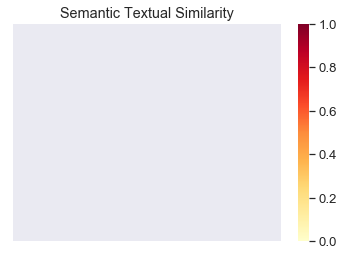

In [23]:
import seaborn as sns
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

num_samples = 5
off_set = 10000

plot_similarity(data.iloc[off_set:off_set+num_samples]['cleaned'], embeddings[off_set:off_set+num_samples], 90)

# Show neighbours of a comment 
Define which comment to analyze

In [24]:
comment_index = 324
comment = data["cleaned"][comment_index]
comment_list = data["cleaned"].tolist()
print(comment)

Will never vote blue. I don't want carbon taxes or a green new deal




Print similar comments.

In [25]:
def get_top_similar(sentence, sentence_list, similarity_matrix, topN):
    # find the index of sentence in list
    index = sentence_list.index(sentence)
    # get the corresponding row in similarity matrix
    similarity_row = np.array(similarity_matrix[index, :])
    # get the indices of top similar
    indices = similarity_row.argsort()[-topN:][::-1]
    return [sentence_list[i] for i in indices]


for i, value in enumerate(get_top_similar(comment, comment_list, cosine_similarity_matrix, 20)):
  print("Top similar comment {}: {}".format(i+1, value))

Top similar comment 1: Will never vote blue. I don't want carbon taxes or a green new deal


Top similar comment 2: Vote Green Party🌎✌️


Top similar comment 3: “If you don’t vote for me, you ain’t black.” — joe biden


Top similar comment 4: Not voting for anyone that’s trying to raise our taxes , people have been a
lot of better off now with Trump in office than before , I don’t support trump
personally just because the fact the white supremacy people make him seem like
a racist but since he has been in office a lot of you are better off
financially now than you were a few years ago


Top similar comment 5: Biden: I don't support the green new deal  
Biden: The green new deal will pay for itself


Top similar comment 6: Imagine how stupid you have to be to vote for a climate change denying C list
reality TV star who can't even tie his own shoe laces .This is most of
America.


Top similar comment 7: If I can I will vote for president Trump.


Top similar comment 8: Trump is positive 